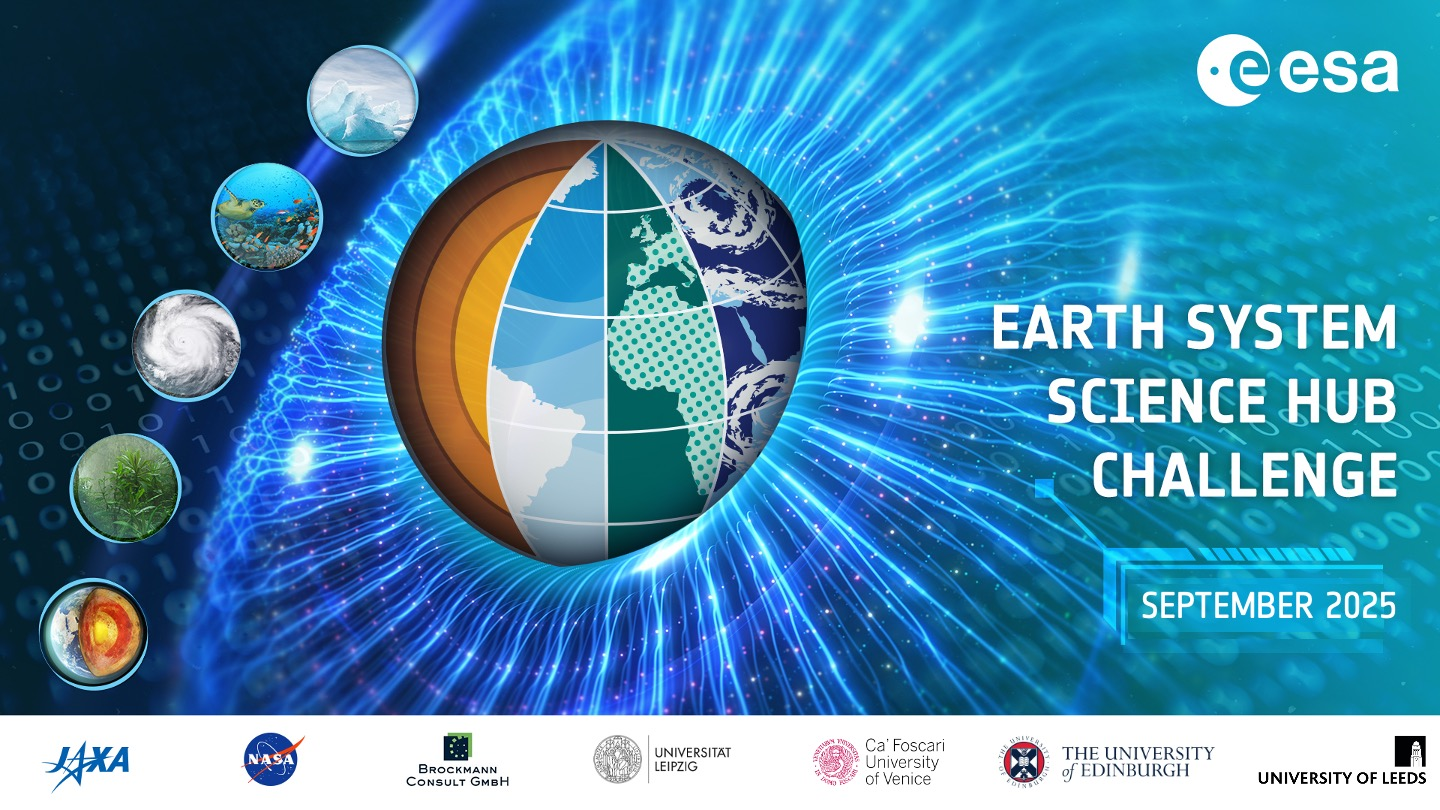

# PART 1: SUMMARY

<hr>

# <a id='section1'></a><span style='color:DarkCyan'> 1. Title </center> </span>
 
**Clouds and aerosols interactions from EarthCare through k-means clustering**

**Author(s):** Paula Romero Jure, Giacomo Roversi and Filippo Calì Quaglia <br>
**Group name:**  Group 1<br> 
**Challenge:** (1.) Aerosols and Clouds classification and interactions from EarthCare datasets on MAAP (AC-TC EarthCARE Level 2 (https://amt.copernicus.org/articles/17/7007/2024/ ) through unsupervised or supervised ML methods such as K-means Clustering, to look at potential changes in cloud properties, both macro and microphysical, related to the presence and characteristics of aerosols for each level detected by EarthCare radar and lidar. This could be done in different areas, related to the know aerosol types distribution and clouds structure, eg. Tropics, subtropics, poles, distinguishing between land and ocean.






<br> 

**Submission date:** 30/09/2025 <br> 

<br> 


# <a id='section2'></a><span style='color:DarkCyan'> 2. Description </center> </span>

### Description of research approach

Are aerosols related to changes in clouds characteristics, specifically the liquid and ice content?

The idea of this research is to use EarthCARE measurements to analyze aerosol-clouds interactions over three different regions: West Pacific, East Pacific and a slice of the Southern Ocean.
Why these regions? 

The tropics are characterized by a band of deep convective clouds that goes up to 20 degrees north in latitude called the ITCZ.
In the West Pacific ocean, we expect to find incoming anthropogenic aerosols from China or non-anthropogenic aerosols produced by biomass burn from southeast Asia/Australia. 

In the East Pacific Ocean instead, we expect mostly sea salt aerosols.
However, it is not clear whether aerosols contribute to enhance convection or not. Correlations between increase in cloud amounts and aerosols have been found, but the causality is still debated. This is particularly challenging to understand from observations, as aerosols are detected by Lidar but Lidar gets extinguished in clouds made of ice at their tops, such us the ones predominant in this band of the Tropics. In the southern ocean, incoming aerosols from higher latitudes can produce changes in the clouds. 

The main method for the analysis is the K-means clustering, which needs numerical, normalized variables. We select the satellite products accordingly. From the Cloud Profiling Radar (CPR), we wanted to obtain cloud variables, therefore we use the level 2A product and extract  Liquid Water Path (LWP) and Ice Water Path (IWP), which give us information on the vertical structure of the cloud and its thickness.

From the  Lidar (ATLID), we want to get information about the presence of aerosols, so we use the level 2A product to extract the Aerosol Optical Thickness (AOT) which gives us an idea of the presence and amount of aerosols.

Finally, we considered also the the synergetic product available: the AC__TC__2A. This product integrates radar and lidar measurements and provides us with a labelling of the dominant type of target (aerosol, droplet or ice crystal for example).  Since the labelling data does not allow for a distance metric, we leave it out the clustering and use it to evaluate the clusters afterwards.

----

Here in the **Figure** below an example of AC__TC__2A profile over the west pacific. We can clearly ideantify two deep convective clouds, where rain, liquid, ice and mixed phase are present.
Regarding the aerosols, we see a mix of sea salt and continental pollution in the lower part of the troposphere. We also see how clearly the lidar gets extinguished at the top of the deep convective cloud, as we cannot see aerosols beneath the cloud, but we do see them to the sides.

Finally, there are stratospheric aerosols at the top of the picture at the beginning of the stratosphere, a feature that seems common throughout many scenes in this area.
![AC__TC__2B frame 05933E](https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/AC__TC__2B/AD/2025/06/14/ECA_EXAD_AC__TC__2B_20250614T064245Z_20250614T224408Z_05933E/public/ECA_EXAD_AC__TC__2B_20250614T064245Z_20250614T224408Z_05933E.BID_0.jpeg)

# <a id='section3'></a><span style='color:DarkCyan'> 3. Table of Contents </center> </span> 

 1. [Title](#section1)
 2. [Description](#section2)
 3. [Table of Contents](#section3)
 4. [References](#section4)
 5. [Key Conclusions](#section5)
 6. [Societal Context](#section6)
 7. [Import libraries](#section7)
 8. [Access dataset](#section8)
 9. [Analysis cells](#section9)


# <a id='section4'></a><span style='color:DarkCyan'> 4. References </center> </span>

- EarthCARE Product Data Handbook: https://earthcarehandbook.earth.esa.int/catalogue

- Wildfires in Southeast Asia pollute the atmosphere in the northern South China Sea - ScienceDirect

- Wildfires 2025 review: ASEAN reduces emissions, but haze persists | Copernicus

- AMT - Cloud top heights and aerosol layer properties from EarthCARE lidar observations: the A-CTH and A-ALD products

- GMD - Estimation of aerosol and cloud radiative heating rate in the tropical stratosphere using a radiative kernel method

- Microphysical fingerprints in anvil cloud albedo

- Grabowski and Morrison, 35 2016;

- Heikenfeld et al., 2019;

- Igel and van den Heever, 2021;

- Barthlott et al., 2022;

- Varble et al., 2023




# <a id='section5'></a><span style='color:DarkCyan'> 5. Key Conclusions </center> </span>


***!! Draft from notes !!***

The mechanism of cloud droplet formation within aerosol-polluted environment are very complex, still debated and different for different types of clouds and different aerosols species. ​

Here we present a VERY simplified theoretical framework on how this works, which is know as aerosols-clouds interactions. ​

Clouds can be made of liquid droplets or solid ice crystal (sometimes both). The amount of droplets within the cloud and their size is important because not only it can change the macrophysical properties of the clouds, and their "capacity" to make it rain, but also changes in these microphysical properties produce changes in the way that clouds interact with the incoming radiation from the sun and outgoing radiation from Earth. ​

Aerosols can produce changes in the microphysics of clouds, ie the formation and type of cloud droplets. Aerosols can act as Cloud condensation nuclei (CCN), which is a particle around which the water particles will condense and form cloud droplet. They can also be Ice nucleating particles, ie ice particles will form around the aerosol particle. ​

We know more about low and liquid clouds interactions with aerosols.​

For deep convective clouds, high clouds and ice clouds, we have many hints through modelling and laboratory experiments. However, the complex and interaction conditions from the upper atmosphere are difficult to fully reproduce. Therefore, these mechanisms are still being  debated.​

Satellite observations have given us many hints on possible relations but there are still some constrains in understanding causality from them. ​

We can mostly expect sea salt aerosols in these area, although there might also be some stratospheric aerosols incoming mostly from volcanic eruptions. ​

The presence of aerosols can lead to precipitation changes (rain supression) by providing more CCNs. ​

Also, if the clouds change their properties due to the interactions with aerosols, these could lead to a feedback process with the surface.  ​

Ie, if we have enough clouds, and the clouds become less reflective to the surface or does not allow the reflected radiation from the ice sheet to escape the Earth, then this could lead to a positive feedback process. ​

# <a id='section6'></a><span style='color:DarkCyan'> 6. Societal Context </center> </span>
***!! Draft from notes !!***

There are different sources of aerosols that can get to even quite isolated areas in the Pacific. ​

Different types of aerosols can act differently.​

Within the non-anthropogenic aerosols, ie aerosols not created directly by human activities, ​

the first one is sea salt. This will not be uniform, as the winds, waves and convection can cause different distributions of this type of aerosol. This will be present across all the oceans.​

Other non anthropogenic aerosols that can reach the West Pacific is the carbon dioxide coming from forest burning in southeast Asia. ​

Anthropogenic aerosols are aerosols that are directly produced from human activity. For example, the ones produced during fossil fuel burning or industrial activity, like sulfate and nitrogen oxides. ​

They can reach the west Pacific according to the winds and dynamical conditions, mostly incoming from south-west China. ​

https://phys.org/news/2015-12-salty-sea-affects-lifetimes-clouds.html 

# PART 2: SCIENTIFIC EXPLOITATION AND ANALYSIS

<hr>

# <a id='section7'></a><span style='color:DarkCyan'> 7. Import Libraries </center> </span>

In [1]:
# Install required libraries and packages with conda
#%conda install -y -c conda-forge numpy scipy xarray pandas h5py h5netcdf netcdf4 cftime zarr pystac-client fsspec matplotlib tqdm aiohttp requests ipykernel seaborn scikit-learn cartopy

In [2]:
# Import libraries
from pystac_client import Client
import fsspec
import xarray as xr
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd 
import requests
from IPython.display import Image, display
import os 
import pathlib
from tqdm import tqdm

from scipy import stats  # will use scipy.stats.mode as the reducer
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


/home/jovyan/conda_envs/earthcare/lib/python3.13/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


# <a id='section8'></a><span style='color:DarkCyan'> 8. Data sources </center> </span>

Please update the table with information about dataset used for your specific case. *Table below provides just an example of the available variable description, please update it according to your case study!* <br> 

| Datacube name | Variable name| Description  | Reference* | Region | Time range | Resolution | 
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| (ESDC) v3.0.1 | air_temperature_2m | <a href="https://deepesdl.readthedocs.io/en/latest/datasets/ESDC/#air_temperature_2m" target="_blank">metadata description</a> | <a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overviewhttps://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview" target="_blank">link to source</a> | region name | temporal reoslution | spatial resolution | <br>
|ATL_ALD_2A| <br>
|CPR_CLD_2A| <br>
|AC__TC__2B| <br>

*:*In case your dataset is not incorporated in public xcube store, please indicate the location of your dataset in these other repositories by updating* <b> Reference</b> *field*.


Here you can start with accessing the relevant data for your project 

In [3]:
# CODE SECTION

# <a id='section9'></a><span style='color:DarkCyan'> 9. Analysis cells </center> </span>


Please comment your code, describe the functions, remove dead and unreachable code.  


### Token
You can generate the token [here](https://portal.maap.eo.esa.int/ini/services/auth/token/index.php). Currently this is only valid for 10 h! 


In [4]:
with open("token.txt","rt") as f:
    token = f.read().strip().replace("\n","")

In [5]:
catalog_url = 'https://catalog.maap.eo.esa.int/catalogue/'
catalog = Client.open(catalog_url)
EC_COLLECTION = ['EarthCAREL2Validated_MAAP']

In [6]:
# Geographic areas
geoboxes = {
    "WestPacific":[ 100,   0,  160,  20],  # [ 100, -15,  160, 30]
    "EastPacific":[-160,   0, -100,  20], # [-160, -10, -100, 20]
    "Antarctica1": [ 160, -80,  180, -60],
    "Antarctica2": [ -180, -80, -140, -60],

}

# EarthCARE products
products = ["ATL_ALD_2A", "CPR_CLD_2A", "AC__TC__2B"]

In [7]:
[geoboxes[i] for i in geoboxes]

[[100, 0, 160, 20],
 [-160, 0, -100, 20],
 [160, -80, 180, -60],
 [-180, -80, -140, -60]]

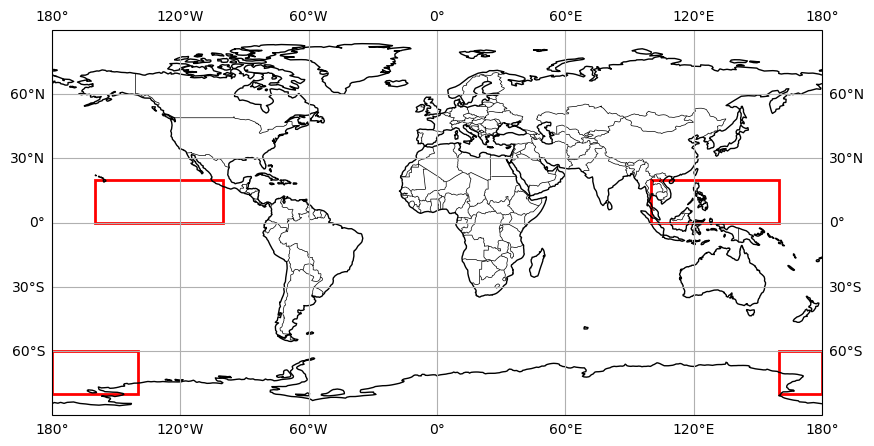

In [8]:
# Crea mappa
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.gridlines(draw_labels=True)

# Aggiungi i box
for lon_min, lat_min, lon_max, lat_max in [geoboxes[i] for i in geoboxes]:
    width = lon_max - lon_min
    height = lat_max - lat_min
    rect = Rectangle(
        (lon_min, lat_min), width, height,
        linewidth=2, edgecolor='red', facecolor='none',
        transform=ccrs.PlateCarree()
    )
    ax.add_patch(rect)

plt.show()


In [9]:
# TODO Spostare leggermente i box?
geoboxes["Antarctica1"]


[160, -80, 180, -60]

In [10]:
def load_and_prepare_all(bbox, product, token=token):

    variables = {
        "ATL_ALD_2A":  ['latitude', 'longitude', 'aerosol_optical_thickness_355nm'],
        "CPR_CLD_2A":  ['latitude', 'longitude', 'land_flag', 'ice_water_path', 'liquid_water_path'],
        "AC__TC__2B" : ['latitude', 'longitude', 'synergetic_target_classification']
    }
    
    search_string = f"productType = '{product}'"
    print(search_string)
    
    search = catalog.search(
        collections=EC_COLLECTION, 
        filter=search_string, # Filter by product type
        bbox = bbox,
        method = 'GET', # This is necessary 
    )

    items = list(search.items())
    print(f"{search.matched()} items found that matched the query.")

    # Using Pandas dataframes for ease of use. This is not mandatory, but just a nice way to get an overview of the products you found through the search. Please note that pandas dataframes run into issues if we try to pass to many products. Use max_items! :) 
    data = search.item_collection_as_dict()
    
    df = pd.json_normalize(data, record_path=['features'])[
        [
            "id",
            "properties.product:type",                
            "properties.updated",                     
            "assets.product.href",
            "assets.quicklook.href",
            "assets.enclosure_1.href",
            "assets.enclosure_2.href",
        ]
    ]
    
    # Renaming the assets for 
    df.rename(columns={
        'properties.product:type': 'product_type',
        'properties.updated': 'last_modified',
        'assets.product.href': 'Zipped Product',
        'assets.quicklook.href': 'quicklook_url',
        'assets.enclosure_1.href': 'h5_url',
        'assets.enclosure_2.href': 'HDR_url',
    }, inplace=True)
    
    df.sort_values(by='id', ascending=True, inplace=True)
    df.reset_index(drop=True, inplace=True)
       
    frames = []
    for i in tqdm(range(len(df))):
        
        ds_url = df.loc[i, "h5_url"]
        
        #print(ds_url)
        if ds_url[-3:] != ".h5":
            continue
        
        fs = fsspec.filesystem("https", headers={"Authorization": f"Bearer {token}"})
        with fs.open(ds_url, "rb") as f:
            
            # Open the data
            ds = xr.open_dataset(f, engine="h5netcdf", group="ScienceData").compute()
            
            # Get the variables
            selection = ds[variables[product]]
            
            if product == "AC__TC__2B":
                # Set unique coordinate to along track dimension
                # selection = selection.assign_coords(along_track=ds['time'])
                selection = selection.assign_coords(along_track=ds['time'], JSG_height=ds['height'].isel(along_track=0))
                selection = selection.rename({"along_track":"time"})
                
                binned = selection['synergetic_target_classification'].groupby_bins('JSG_height', bins=[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000])
                coarse = binned.reduce(lambda arr, axis: stats.mode(arr, axis=axis, keepdims=False).mode)
                
                # Turn bins into variables
                binned_ds = coarse.to_dataset(dim="JSG_height_bins")
        
                # Clean variable names (optional: make them short and safe)
                binned_ds = binned_ds.rename(
                    {bin_label: f"stc_{(i+1)*2500}" for i, bin_label in enumerate(binned_ds.data_vars)}
                )
                
                # Append to the original Dataset
                final = selection[['latitude', 'longitude']].merge(binned_ds)
                
                frames.append(final)
                
            else:
                # Set unique coordinate to along track dimension
                selection = selection.assign_coords(along_track=ds['time'])
                selection = selection.rename({"along_track":"time"})
                frames.append(selection)
    
    data = xr.concat(frames, dim='time')
    data_sorted = data.sortby('time')
    data_1s = data_sorted.resample(time='1s').mean().dropna(dim='time', how='all')

    if product == "ATL_ALD_2A":
        data_1s = data_1s.where(data_1s != 0.)

    # Enforce the bounding box
    data_1s = data_1s.where(
        (data_1s.latitude >= bbox[1]) & 
        (data_1s.latitude < bbox[3]) & 
        (data_1s.longitude >= bbox[0]) & 
        (data_1s.longitude < bbox[2]), 
        drop=True
    )
    
    return data_1s

The code here works now for Antarctica, some adjustments are needed for the other areas
```
suffix = ["_AN", "_EP", "_WP"]

if loc == "Antarctica":
    # include also Antarctica2
    geoboxes["Antarctica2"] ...
```

In [11]:
if not os.path.exists('challenge_1min_complete_AN.nc'):
    
    # Run the function for all the three products on a specified area and merge the results
    a = load_and_prepare_all(geoboxes["Antarctica1"], "AC__TC__2B")
    b = load_and_prepare_all(geoboxes["Antarctica1"], "CPR_CLD_2A")
    c = load_and_prepare_all(geoboxes["Antarctica1"], "ATL_ALD_2A")
    challenge = a.merge(b[['land_flag', 'ice_water_path', 'liquid_water_path']], join='outer', compat='override')
    challenge = challenge.merge(c, join='outer', compat='override')
    
    # Repeat for the second part of Antarctica
    a = load_and_prepare_all(geoboxes["Antarctica2"], "AC__TC__2B")
    b = load_and_prepare_all(geoboxes["Antarctica2"], "CPR_CLD_2A")
    c = load_and_prepare_all(geoboxes["Antarctica2"], "ATL_ALD_2A")
    challenge2 = a.merge(b[['land_flag', 'ice_water_path', 'liquid_water_path']], join='outer', compat='override')
    challenge2 = challenge2.merge(c, join='outer', compat='override')
    
    challenge = challenge.merge(challenge2, join='outer', compat='override')
    
    numerical_variables = [
        'latitude',
        'longitude',
        'land_flag',
        'ice_water_path', 
        'liquid_water_path', 
        'aerosol_optical_thickness_355nm'
    ]
    
    # Let's put nans to zero when sensors are working and sky is clear
    challenge[numerical_variables[2:]] = challenge[numerical_variables[2:]].fillna(0).clip(min=0, max=1e2)
    
    ## Now resample again to 1min to get both aerosols and clouds in the same pixel
    # Numerical variables with mean:
    challenge_1min_numerical = challenge[numerical_variables].resample(time='1min').mean().dropna(dim='time', how='any')
    
    # Save the numerical dataset
    challenge_1min_numerical.to_netcdf('challenge_1min_numerical_AN.nc')
    
    # Label variables with mode
    def mode_func(arr, axis): #They need a specific funcion to be resampled with the mode instead of the mean.
        # scipy returns both mode and count, we only want the mode
        return stats.mode(arr, axis=axis, keepdims=False).mode   # , nan_policy="omit"
    
    challenge_1min_labels = (
        challenge
        .drop_vars(numerical_variables)
        .resample(time="1min")
        .reduce(mode_func)
        .dropna(dim="time", how="any")
    )
    
    # Save the resampled TC dataset
    challenge_1min_labels.to_netcdf('challenge_1min_labels_AN.nc')
    
    # Merge back together
    challenge_1min_complete = (
        challenge_1min_numerical
        .merge(
            challenge_1min_labels, 
            join='outer', 
            compat='override')
    )
    
    # Save the merged dataset
    challenge_1min_complete.to_netcdf('challenge_1min_complete_AN.nc')

else:
    challenge_1min_complete = xr.open_dataset(f"challenge_1min_complete_AN.nc")

productType = 'AC__TC__2B'
796 items found that matched the query.



00%|██████████| 796/796 [05:26<00:00,  2.44it/s] 

productType = 'CPR_CLD_2A'
1671 items found that matched the query.



00%|██████████| 1671/1671 [44:12<00:00,  1.59s/it] 

productType = 'ATL_ALD_2A'
1495 items found that matched the query.



00%|██████████| 1495/1495 [12:38<00:00,  1.97it/s] 

productType = 'AC__TC__2B'
1236 items found that matched the query.



00%|██████████| 1236/1236 [07:43<00:00,  2.67it/s]

productType = 'CPR_CLD_2A'
2553 items found that matched the query.



00%|██████████| 2553/2553 [1:03:04<00:00,  1.48s/it]

productType = 'ATL_ALD_2A'
2300 items found that matched the query.



sh: 1: getfattr: not found
21:57<00:00,  1.75it/s] 

## K-Means

In [12]:
def cluster_variance(n, x):
    variances=[]
    kmeans=[]
    outputs=[]
    K=[i for i in range(1,n+1)]
    for i in range(1,n+1):
        variance=0
        model=KMeans(n_clusters=i,random_state=82,verbose=2).fit(x)
        kmeans.append(model)
        variances.append(model.inertia_)
    return variances,K,n

In [13]:
geoboxes

{'WestPacific': [100, 0, 160, 20],
 'EastPacific': [-160, 0, -100, 20],
 'Antarctica1': [160, -80, 180, -60],
 'Antarctica2': [-180, -80, -140, -60]}

In [14]:
ds = xr.open_dataset(f"challenge_1min_numerical_AN.nc")


sh: 1: getfattr: not found


In [15]:
# Enforce the bounding box
ds = ds.where(
    (
        (ds.latitude >= geoboxes["Antarctica1"][1]) & 
        (ds.latitude < geoboxes["Antarctica1"][3]) & 
        (ds.longitude >= geoboxes["Antarctica1"][0]) & 
        (ds.longitude < geoboxes["Antarctica1"][2])
    ) | (
        (ds.latitude >= geoboxes["Antarctica2"][1]) & 
        (ds.latitude < geoboxes["Antarctica2"][3]) & 
        (ds.longitude >= geoboxes["Antarctica2"][0]) & 
        (ds.longitude < geoboxes["Antarctica2"][2])
    ), 
    drop=True
)

In [16]:
x = ds.drop_vars(['latitude','longitude']).to_array().transpose("time", "variable").values
# x = ds.to_array().transpose("time", "variable").values

x = (x - np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
x

array([[0.66493506, 0.07297073, 0.        , 0.        ],
       [0.20952381, 0.36253172, 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]], shape=(791, 4))

Initialization complete
Iteration 0, inertia 83.94128020063762.
Iteration 1, inertia 79.04169812862384.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 55.46179566017088.
Iteration 1, inertia 23.291296049752884.
Iteration 2, inertia 22.259663904984322.
Iteration 3, inertia 22.127212169527848.
Iteration 4, inertia 22.12265737795621.
Iteration 5, inertia 22.120893721611928.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 21.50591502854491.
Iteration 1, inertia 17.69848910829133.
Iteration 2, inertia 17.51409281451823.
Iteration 3, inertia 17.47445261533057.
Iteration 4, inertia 17.465234232507857.
Iteration 5, inertia 17.459938808821445.
Iteration 6, inertia 17.456770761891715.
Iteration 7, inertia 17.440405375460486.
Iteration 8, inertia 17.42033102539664.
Iteration 9, inertia 17.41226327971376.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 16.41105342176402

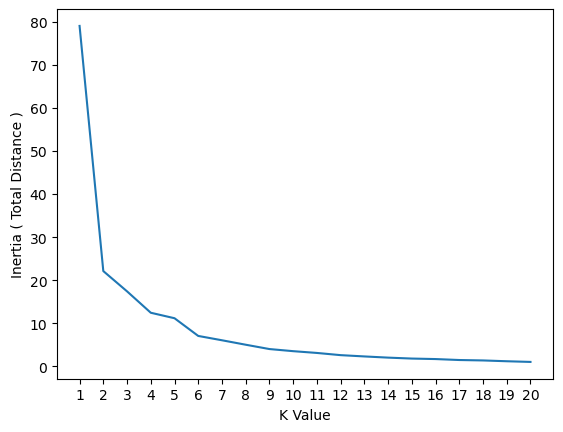

In [17]:
variances,K,n=cluster_variance(20, x)
plt.plot(K,variances)
plt.ylabel("Inertia ( Total Distance )")
plt.xlabel("K Value")
plt.xticks([i for i in range(1,n+1)])
plt.show()

In [18]:
ds

<xarray.Dataset> Size: 35kB
Dimensions:                          (time: 791)
Coordinates:
  * time                             (time) datetime64[ns] 6kB 2025-06-12T16:...
Data variables:
    latitude                         (time) float64 6kB -78.3 -75.54 ... -79.23
    longitude                        (time) float64 6kB 175.4 167.3 ... 176.4
    land_flag                        (time) float64 6kB 0.6649 0.2095 ... 0.0
    ice_water_path                   (time) float32 3kB 0.06735 0.3346 ... 0.0
    liquid_water_path                (time) float32 3kB 0.0 0.0 0.0 ... 0.0 0.0
    aerosol_optical_thickness_355nm  (time) float32 3kB 0.0 0.0 0.0 ... 0.0 0.0

In [19]:
k = 5

# Applichiamo K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(x)


In [20]:
vars = {
    # 'lat': 0,
    # 'lon': 1,
    'landf' : 0 ,
    'iwp': 1,
    'lwp': 2,
    'aot': 3
}

In [21]:
def plot_kmeans(x, varX, varY, ax=None):

    if not ax:
        fig, ax = plt.subplots()
    
    # Visualizziamo i dati colorati in base ai cluster trovati
    ax.scatter(x[:, vars[varX]], x[:, vars[varY]], c=y_kmeans, s=10, cmap='jet', alpha=0.5)  #'viridis')
    
    # Mostriamo anche i centroidi
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, vars[varX]], centers[:,  vars[varY]], c='red', s=50, alpha=0.75, marker='X', label='Centroids')
    for i in np.arange(1,6):
        ax.text(centers[(i-1), vars[varX]]*1.1, centers[(i-1),  vars[varY]]*1.1, s=str(i), c='red')
    
    ax.set_title("K-Means clustering")
    ax.set_xlabel(varX)
    ax.set_ylabel(varY)
    ax.legend()


In [22]:
[str(i) for i in np.arange(1,6)]

['1', '2', '3', '4', '5']

In [23]:
kmeans.cluster_centers_

array([[ 9.37773535e-01,  6.44299081e-02, -6.50521303e-19,
         4.83169010e-03],
       [ 5.99111239e-03,  1.01311943e-02,  1.62866450e-03,
         1.34518700e-02],
       [ 4.08730159e-02,  6.57179422e-01,  0.00000000e+00,
         3.46944695e-18],
       [ 4.56176368e-01,  2.43666637e-02, -4.33680869e-19,
         2.24304667e-02],
       [ 2.51322751e-03,  1.60728047e-03, -2.16840434e-19,
         3.61514947e-01]])

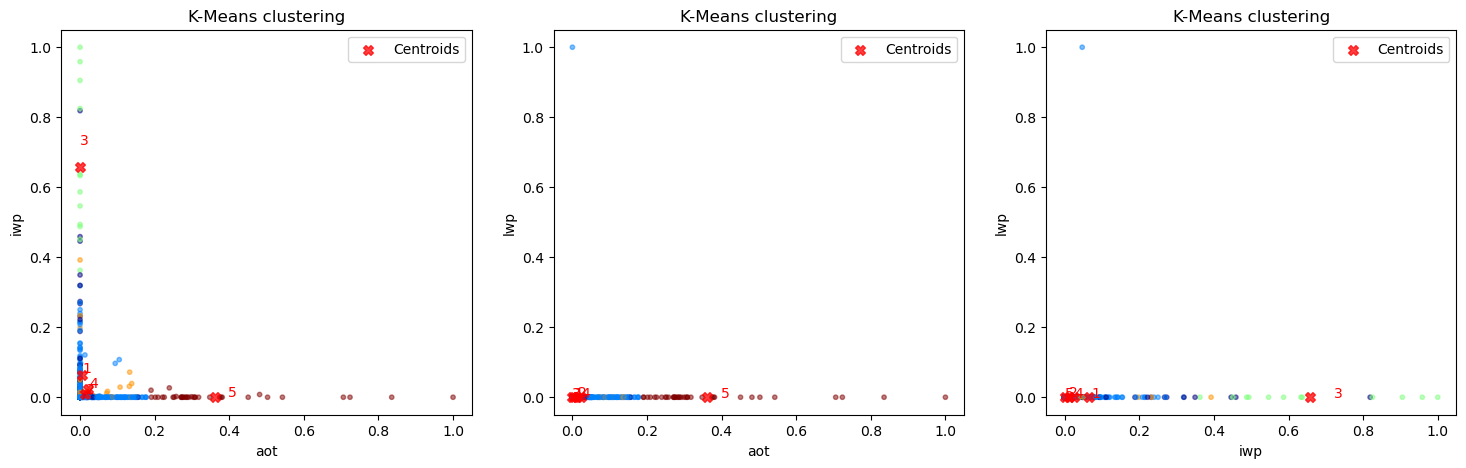

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

varX='aot'
varY='iwp'

plot_kmeans(x, varX, varY, ax=axes[0])

varX='aot'
varY='lwp'

plot_kmeans(x, varX, varY, ax=axes[1])


varX='iwp'
varY='lwp'

plot_kmeans(x, varX, varY, ax=axes[2])

(0.0, 0.25)

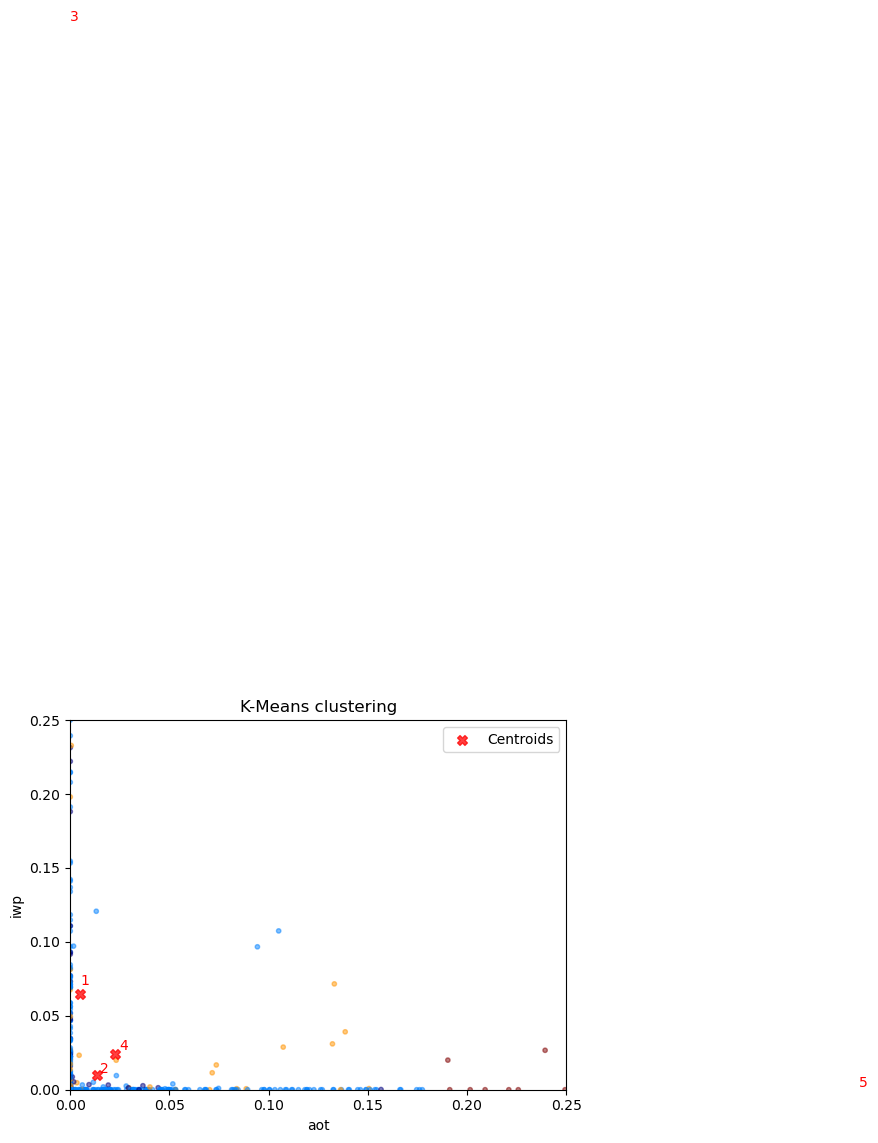

In [25]:
varX='aot'
varY='iwp'

plot_kmeans(x, varX, varY)
plt.xlim(0, 0.25)
plt.ylim(0, 0.25)

### Classes we were expepcting:

- Cluster 4: Aerosol with no clouds

- Cluster 3: Ice and water with no transparency (ATLID is not seeing aerosol)

Let's see the other three


In [26]:
# select only clusters 1, 2 and 5

In [27]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4], dtype=int32)

In [28]:
indices = np.where((y_kmeans == 0) | (y_kmeans == 1) | (y_kmeans == 4))[0]

(0.0, 0.1)

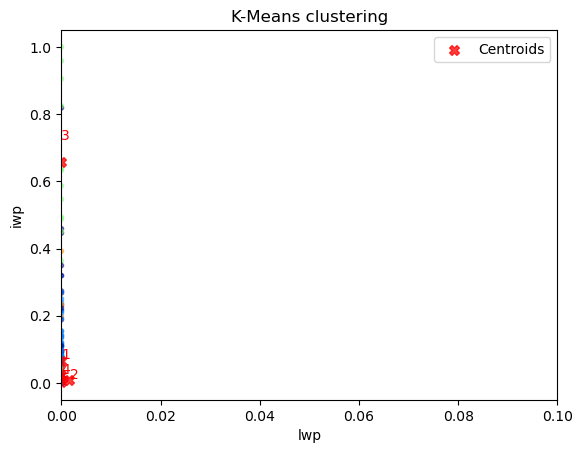

In [29]:
varX='lwp'
varY='iwp'

plot_kmeans(x, varX, varY)
plt.xlim(0, .1)

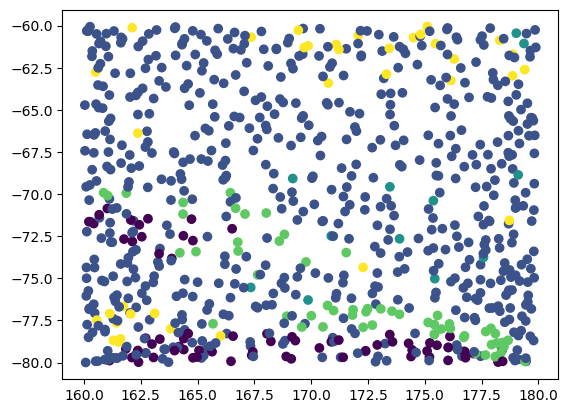

In [30]:
plt.scatter(ds['longitude'].values, ds['latitude'].values, c=y_kmeans, cmap='viridis')

Text(0, 0.5, 'latitude')

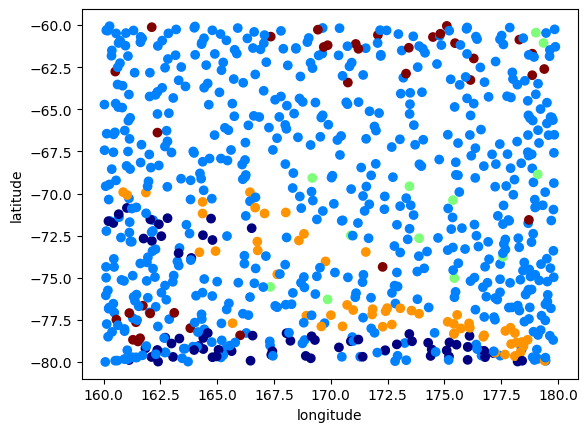

In [31]:
# Same plot, different color map
plt.scatter(ds['longitude'].values, ds['latitude'].values, c=y_kmeans, cmap='jet')
plt.xlabel('longitude')
plt.ylabel('latitude')

### Explore the classification differences among the clusters at different heights

In [32]:
ds_tc = challenge_1min_complete
ds_tc

<xarray.Dataset> Size: 85kB
Dimensions:                          (time: 791)
Coordinates:
  * time                             (time) datetime64[ns] 6kB 2025-06-12T16:...
Data variables: (12/14)
    latitude                         (time) float64 6kB -78.3 -75.54 ... -79.23
    longitude                        (time) float64 6kB 175.4 167.3 ... 176.4
    land_flag                        (time) float64 6kB 0.6649 0.2095 ... 0.0
    ice_water_path                   (time) float32 3kB 0.06735 0.3346 ... 0.0
    liquid_water_path                (time) float32 3kB 0.0 0.0 0.0 ... 0.0 0.0
    aerosol_optical_thickness_355nm  (time) float32 3kB 0.0 0.0 0.0 ... 0.0 0.0
    ...                               ...
    stc_7500                         (time) float64 6kB 1.0 21.0 ... 1.0 21.0
    stc_10000                        (time) float64 6kB 1.0 21.0 ... 1.0 21.0
    stc_12500                        (time) float64 6kB 21.0 1.0 ... 1.0 21.0
    stc_15000                        (time) float64 6kB 33.0 1.0 1.0 ... 1.0 1.0
    stc_17500                        (time) float64 6kB 26.0 26.0 ... 1.0 1.0
    stc_20000                        (time) float64 6kB 26.0 1.0 1.0 ... 1.0 1.0

In [33]:
# Synergetic class range and colors
plot_range = range(-1, 35)  # inclusive -1..33
plot_colors = [
    "#c5c9c7", "#a2653e", "#ffffff", "#ff474c", "#0504aa", "#009337",
    "#840000", "#042e60", "#d8dcd6", "#ffff84", "#f5bf03", "#f97306",
    "#ff000d", "#5539cc", "#2976bb", "#0d75f8", "#014182", "#017b92",
    "#06b48b", "#aaff32", "#6dedfd", "#01f9c6", "#7bc8f6", "#d7fffe",
    "#a2cffe", "#04d9ff", "#7a9703", "#b2996e", "#ffbacd", "#d99b82",
    "#947e94", "#856798", "#ac86a8", "#59656d", "#76424e", "#363737"
]

labels = [
    "-1: unknown"," 0: ground"," 1: clear"," 2: possible rain (clutter)"," 3: possible snow (clutter)",
    " 4: possible cloud (clutter)"," 5: heavy rain"," 6: heavy mixed-phase precip",
    " 7: no rain/ice (possible liquid)"," 8: liquid cloud"," 9: drizzling liquid cloud",
    "10: warm rain","11: cold rain","12: melting snow","13: snow (possible liquid)",
    "14: snow (no liquid)","15: rimed snow (possible liquid)",
    "16: rimed snow + supercooled liquid","17: snow + supercooled liquid",
    "18: supercooled liquid","19: ice cloud (possible liquid)",
    "20: ice + supercooled liquid","21: ice cloud (no liquid)",
    "22: stratospheric ice","23: STS (PSC Type I)","24: NAT (PSC Type II)","25: insects",
    "26: dust","27: sea salt","28: continental pollution","29: smoke","30: dusty smoke",
    "31: dusty mix","32: stratospheric ash","33: stratospheric sulfate","34: stratospheric smoke"
]

# Build discrete colormap
cmap = mcolors.ListedColormap(plot_colors)
bounds = list(plot_range) + [34]   # bin edges
norm = mcolors.BoundaryNorm(bounds, cmap.N)# Example: suppose your classification variable is called "target_class"



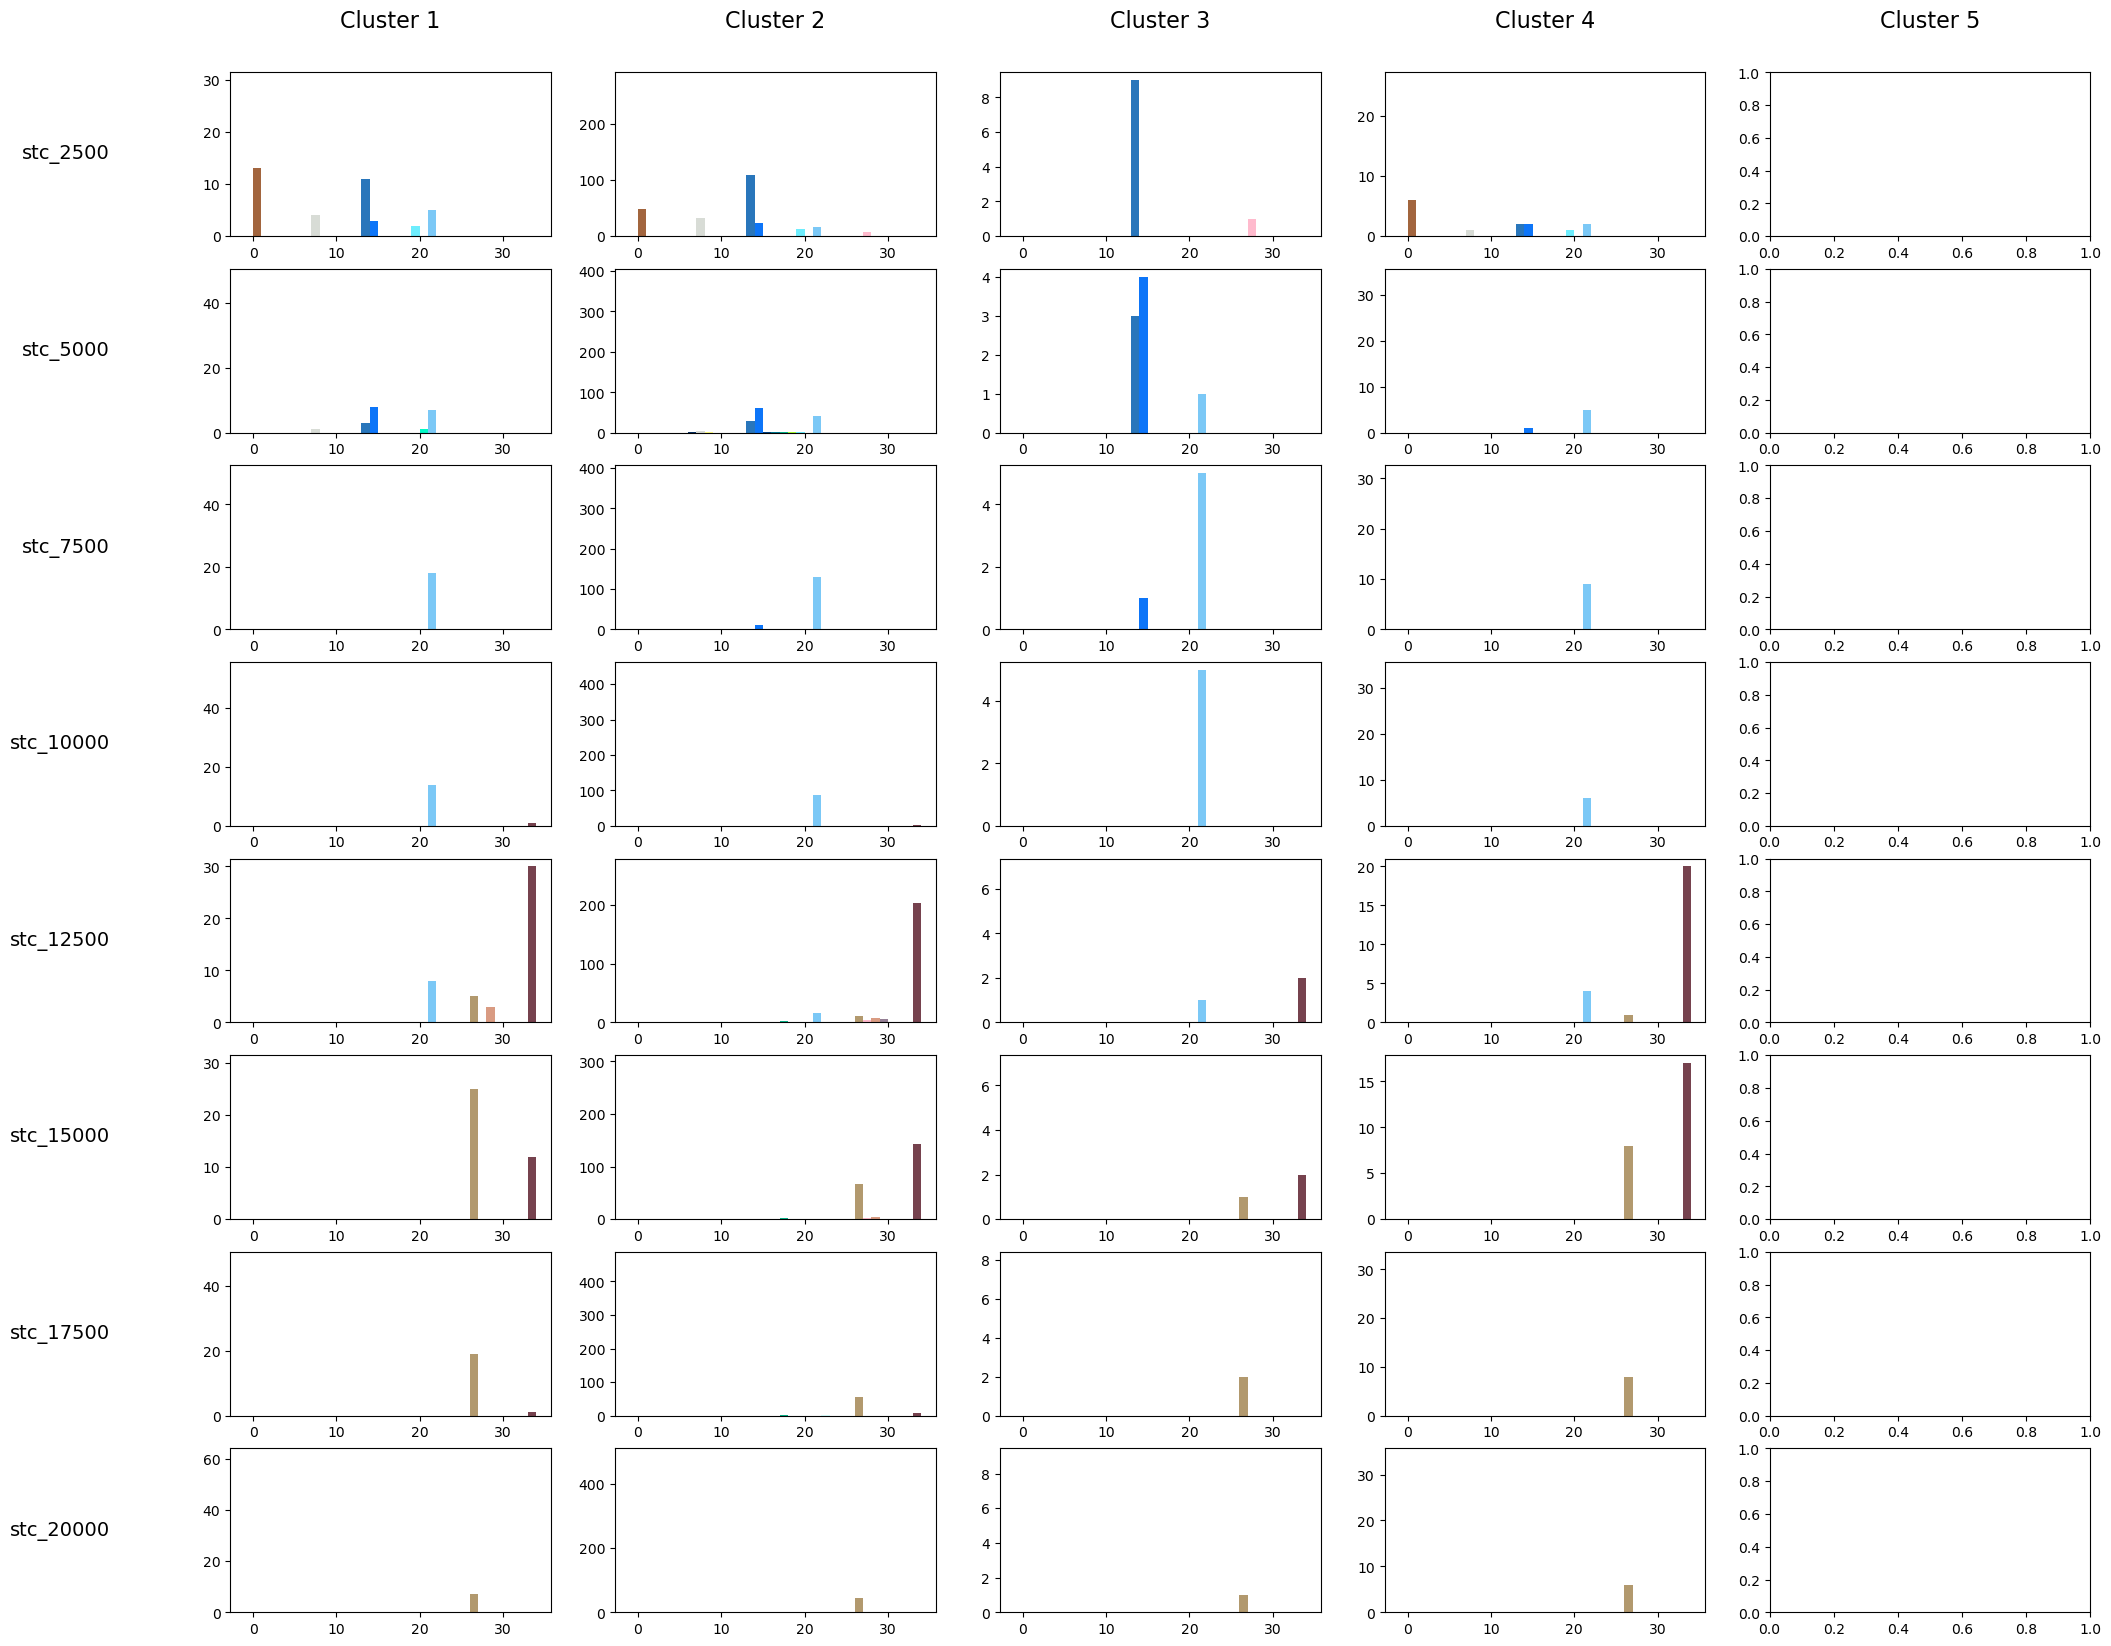

In [34]:
# s = ds_tc["stc_2500"][y_kmeans == 0].plot.hist(bins=bounds)
row_labels = [
    "stc_2500",
    "stc_5000",
    "stc_7500",
    "stc_10000",
    "stc_12500",
    "stc_15000",
    "stc_17500",
    "stc_20000"
]

fig, axes= plt.subplots(8, 5, figsize=(24, 20))

for i, label in enumerate(row_labels): 

    row_axes = axes[i, :]
    # Calcola il centro verticale medio
    y_pos = np.mean([ax.get_position().y0 + ax.get_position().height / 2 for ax in row_axes])
    # Prende la x minima (sinistra)
    x_pos = row_axes[0].get_position().x0 - 0.05
    # Aggiunge il testo
    fig.text(x_pos, y_pos, label, va='center', ha='right', fontsize=14) #, fontweight='bold')
    
    for k in range(4):
        # Crea l'istogramma con 5 bin
        n, bins, patches = axes[i,k].hist(
            ds_tc[label][y_kmeans == k],
            bins=bounds)
        
        for patch, color in zip(patches, plot_colors):
            patch.set_facecolor(color)

col_labels = [
    "Cluster 1",
    "Cluster 2",
    "Cluster 3",
    "Cluster 4",
    "Cluster 5"
]

for j, label in enumerate(col_labels):
    # Prendi gli assi della colonna j
    col_axes = axes[:, j]
    # Calcola la posizione orizzontale centrale della colonna (in figura)
    x0 = min(ax.get_position().x0 for ax in col_axes)
    x1 = max(ax.get_position().x0 + ax.get_position().width for ax in col_axes)
    x_center = (x0 + x1) / 2
    # Calcola la y poco sopra la parte superiore degli assi (usa l’asse superiore)
    top_ax = axes[0, j]
    y_top = top_ax.get_position().y0 + top_ax.get_position().height
    y_text = y_top + 0.02  # spostalo un po’ sopra (modifica questo offset se serve)

    fig.text(x_center, y_text, label, ha='center', va='bottom', fontsize=16) #, fontweight='bold')

